# Aprendizaje Automático y Big Data
## Práctica 1 : Regresión Lineal

Mario Quiñones Pérez y Guillermo García Patiño Lenza

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv

datos = read_csv("ex1data1.csv", header = None).astype(float).to_numpy()

In [2]:
def cost(hipotesis, datos_X, datos_Y):
    m = len(datos_X)
    estimacion = hipotesis(datos_X)
    error = estimacion - datos_Y
    v3 = sum(error**2)
    coste_def = (1/(2*m))*v3
    return coste_def

In [103]:
def calculaHipotesis(datos, alfa):
    X = datos[:,0]
    Y = datos[:,1]
    m = len(X)
    v0 = 0
    v1 = 0
    for i in range(1500):
        print("Para valores " + str(v0) + " y " + str(v1) + " el error es " + str(cost(lambda x : v0 + x*v1,X,Y)) + "\n")
        sum0 =  aplicaHipotesis(v0,v1,X) - Y
        sum1 = (aplicaHipotesis(v0,v1,X) - Y) * X
        v0 = v0 - (alfa/m) * sum(sum0)
        v1 = v1 - (alfa/m) * sum(sum1)
    return (v0,v1)

In [95]:
def aplicaHipotesis(v0,v1,X):
    return v0 + v1*X

In [96]:
def calculaHipotesis2(datos,alfa):
    X = datos[:,0]
    Y = datos[:,1]
    m = len(X)
    v0 = 0
    v1 = 0
    for _ in range(1500):
        sum0 = sum1 = 0
        print("Para valores " + str(v0) + " y " + str(v1) + " el error es " + str(cost(lambda x : v0 + x*v1,X,Y)) + "\n")
        for i in range(m):
            sum0 += (v0 + v1 * X[i]) - Y[i]
            sum1 += ((v0 + v1 * X[i]) - Y[i]) * X[i]
        v0 = v0 - (alfa/m) * sum0
        v1 = v1 - (alfa/m) * sum1
    return (v0,v1)

In [105]:
def main1():
    datos = read_csv("ex1data1.csv", header = None).astype(float).to_numpy()
    params = calculaHipotesis(datos, 0.01)
    print("Mis parametros son " + str(params[0]) + " y " + str(params[1]) + "\n")
    X = datos[:,0]
    Y = datos[:,-1]
    min_X, max_X = min(X), max(X)
    min_Y = min_X * params[1] + params[0]
    max_Y = max_X * params[1] + params[0]
    plt.figure()
    plt.plot(X,Y,"x")
    plt.plot([min_X, max_X],[min_Y, max_Y])
    plt.show()
    plt.savefig("resultado.png")

Para valores 0 y 0 el error es 32.072733877455654

Para valores 0.0583913505154639 y 0.6532884974555674 el error es 6.737190464870008

Para valores 0.0628917527103938 y 0.7700097825599365 el error es 5.931593568604957

Para valores 0.05782292746142808 y 0.7913481156584673 el error es 5.901154707081387

Para valores 0.0510636251607781 y 0.795729810284954 el error es 5.895228586444221

Para valores 0.044014378365002556 y 0.7970961782721866 el error es 5.890094943117332

Para valores 0.036924131142162565 y 0.7979254732843951 el error es 5.885004158443646

Para valores 0.029837117577144787 y 0.7986582394519285 el error es 5.879932480491416

Para valores 0.022761181894038793 y 0.7993727912003019 el error es 5.874879094762575

Para valores 0.015697699574200093 y 0.8000830518518655 el error es 5.8698439118063845

Para valores 0.008646896228913493 y 0.8007914983590768 el error es 5.86482686531293

Para valores 0.0016087930989843232 y 0.8014985729280016 el error es 5.8598278899321805

Para valo

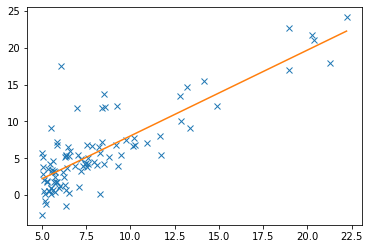

<Figure size 432x288 with 0 Axes>

In [106]:
main1()